# CellTypist

## 1. Loading

## 1.1 Install CellTypist

In [1]:
# !pip install celltypist
# https://celltypist.readthedocs.io/en/latest/notebook/celltypist_tutorial.html
# https://cloud.tencent.com/developer/article/1926662

## 1.2 Import the module

In [1]:
import scanpy as sc
import pandas as pd
import celltypist
import os
from celltypist import models
from matplotlib.pyplot import rc_context

In [2]:
sc.settings.verbosity = 3
sc.logging.print_header()
sc.settings.set_figure_params(dpi=120, frameon=False, figsize=(3, 3), facecolor='white')

scanpy==1.9.1 anndata==0.8.0 umap==0.5.3 numpy==1.21.5 scipy==1.9.1 pandas==1.4.4 scikit-learn==1.1.1 statsmodels==0.13.2 python-igraph==0.9.10 louvain==0.7.1 pynndescent==0.5.4


In [3]:
pd.set_option('display.max_rows', 10)
pd.set_option('display.max_columns', None)

## 1.3 input data

In [4]:
wdir = "/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/02_CellTypist/"
os.chdir( wdir )

In [5]:
adata = sc.read_h5ad("/Users/xuewei/ZxProjects/CRC/2023_GSE231559/01_preprocessing/write/CRC_01_louvain_umap_20231028.h5ad")

In [6]:
adata.shape

(56163, 13401)

In [7]:
adata.obs

batch  n_genes_by_counts  total_counts  n_genes  \
AAAGGGCTCTGCAGCG-1   Col_N_1               1464        6027.0     1464   
AAAGTGAGTCCATACA-1   Col_N_1                965        2267.0      966   
AAAGTGATCGACCACG-1   Col_N_1                727        1730.0      727   
AAAGTGATCTGCATGA-1   Col_N_1                610        1206.0      610   
AACAACCTCAGCTTCC-1   Col_N_1               1718        4330.0     1718   
...                      ...                ...           ...      ...   
TTTGGTTGTTTGACAC-1  Liv_T_12               1497        4999.0     1497   
TTTGGTTTCATAGCAC-1  Liv_T_12               1289        3741.0     1289   
TTTGGTTTCCTCTAGC-1  Liv_T_12               1058        2873.0     1058   
TTTGTTGAGAGGTTTA-1  Liv_T_12                953        2525.0      953   
TTTGTTGGTTTGGCTA-1  Liv_T_12               1061        2860.0     1061   

                    log1p_n_genes_by_counts  log1p_total_counts  \
AAAGGGCTCTGCAGCG-1                 7.289611            8.704170   
AAAGTGAGTCCATACA-1                 6.873164            7.726654   
AAAGTGATCGACCACG-1                 6.590301            7.456455   
AAAGTGATCTGCATGA-1                 6.415097            7.095893   
AACAACCTCAGCTTCC-1                 7.449498            8.373553   
...                                     ...                 ...   
TTTGGTTGTTTGACAC-1                 7.311886            8.517193   
TTTGGTTTCATAGCAC-1                 7.162397            8.227375   
TTTGGTTTCCTCTAGC-1                 6.965080            7.963460   
TTTGTTGAGAGGTTTA-1                 6.860664            7.834392   
TTTGTTGGTTTGGCTA-1                 6.967909            7.958927   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAAGGGCTCTGCAGCG-1                   29.766053            477.0   
AAAGTGAGTCCATACA-1                   20.776356            226.0   
AAAGTGATCGACCACG-1                   31.734104            140.0   
AAAGTGATCTGCATGA-1                   21.890547             67.0   
AACAACCTCAGCTTCC-1                   23.602771            321.0   
...                                        ...              ...   
TTTGGTTGTTTGACAC-1                   25.585117             44.0   
TTTGGTTTCATAGCAC-1                   24.405239             88.0   
TTTGGTTTCCTCTAGC-1                   22.868082            159.0   
TTTGTTGAGAGGTTTA-1                   27.643564            121.0   
TTTGTTGGTTTGGCTA-1                   25.279720            115.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAAGGGCTCTGCAGCG-1               6.169611       7.914385             2692.0   
AAAGTGAGTCCATACA-1               5.424950       9.969122              420.0   
AAAGTGATCGACCACG-1               4.948760       8.092485               42.0   
AAAGTGATCTGCATGA-1               4.219508       5.555556              386.0   
AACAACCTCAGCTTCC-1               5.774551       7.413395              756.0   
...                                   ...            ...                ...   
TTTGGTTGTTTGACAC-1               3.806663       0.880176             1347.0   
TTTGGTTTCATAGCAC-1               4.488636       2.352312              933.0   
TTTGGTTTCCTCTAGC-1               5.075174       5.534285              761.0   
TTTGTTGAGAGGTTTA-1               4.804021       4.792079              683.0   
TTTGTTGGTTTGGCTA-1               4.753590       4.020979              483.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAAGGGCTCTGCAGCG-1                 7.898411        44.665672              0.0   
AAAGTGAGTCCATACA-1                 6.042633        18.526688              2.0   
AAAGTGATCGACCACG-1                 3.761200         2.427746              1.0   
AAAGTGATCTGCATGA-1                 5.958425        32.006634              0.0   
AACAACCTCAGCTTCC-1                 6.629363        17.459585              0.0   
...                                     ...              ...              ...   
TTTGGTTG

In [8]:
adata.obs['sample'] = adata.obs['batch'].replace(
    ['Col_N_1', 'Col_T_1', 'Col_N_2', 'Col_T_2', 'Col_N_3', 'Col_T_3', 'Col_T_4', 'Col_T_5', 'Col_T_6', 'Liv_N_1', 
     'Liv_T_1', 'Liv_N_2', 'Liv_N_3', 'Liv_N_4', 'Liv_T_4', 'Liv_N_5', 'Liv_T_6', 'Liv_N_7', 'Liv_T_8_1', 'Liv_T_8_2', 
     'Liv_N_9', 'Liv_T_9', 'Liv_T_10', 'Liv_N_11', 'Liv_T_11', 'Liv_T_12',
    ],
    ['Col_N', 'Col_T', 'Col_N', 'Col_T', 'Col_N', 'Col_T', 'Col_T', 'Col_T', 'Col_T', 'Liv_N', 
     'Liv_T', 'Liv_N', 'Liv_N', 'Liv_N', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_T', 
     'Liv_N', 'Liv_T', 'Liv_T', 'Liv_N', 'Liv_T', 'Liv_T',
    ])

In [9]:
# pd.set_option('display.max_rows', 200)
# adata.obs[['annotation_authors', 'louvain']].value_counts().head(132)

## 2. Assign cell type labels using a CellTypist built-in model

In this section, we show the procedure of transferring cell type labels from built-in models to the query dataset.

Download the latest CellTypist models.

In [10]:
# # Enabling `force_update = True` will overwrite existing (old) models.
# models.download_models(force_update = True)

In [9]:
models.models_path
models.models_description()

👉 Detailed model information can be found at `https://www.celltypist.org/models`


model  \
0             Immune_All_Low.pkl   
1            Immune_All_High.pkl   
2            Adult_Mouse_Gut.pkl   
3       Autopsy_COVID19_Lung.pkl   
4   COVID19_Immune_Landscape.pkl   
..                           ...   
13          Human_Lung_Atlas.pkl   
14             Human_PF_Lung.pkl   
15       Lethal_COVID19_Lung.pkl   
16        Nuclei_Lung_Airway.pkl   
17           Pan_Fetal_Human.pkl   

                                          description  
0   immune sub-populations combined from 20 tissue...  
1   immune populations combined from 20 tissues of...  
2   cell types in the adult mouse gut combined fro...  
3   cell types from the lungs of 16 SARS-CoV-2 inf...  
4   immune subtypes from lung and blood of COVID-1...  
..                                                ...  
13  integrated Human Lung Cell Atlas (HLCA) combin...  
14  cell types from different forms of pulmonary f...  
15  cell types from the lungs of individuals who d...  
16  cell populations from snRNA-seq of five locati...  
17  stromal and immune populations from the human ...  

[18 rows x 2 columns]

Choose the model you want to employ, for example, the model with all tissues combined containing low-hierarchy (high-resolution) immune cell types/subtypes.

In [30]:
# Indeed, the `model` argument defaults to `Immune_All_Low.pkl`.
model = models.Model.load(model = 'Immune_All_High.pkl')

In [31]:
model
model.description
model.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

Transfer cell type labels from this model to the query dataset using celltypist.annotate.

In [32]:
# Not run; predict cell identities using this loaded model.
# predictions = celltypist.annotate(adata_2000, model = model, majority_voting = True)
# Alternatively, just specify the model name (recommended as this ensures the model is intact every time it is loaded).
predictions = celltypist.annotate(adata, model = 'Immune_All_High.pkl', majority_voting = True)

👀 Detected scaled expression in the input data, will try the `.raw` attribute
🔬 Input data has 56163 cells and 30726 genes
🔗 Matching reference genes in the model
🧬 6124 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
👀 Detected a neighborhood graph in the input object, will run over-clustering on the basis of it
⛓️ Over-clustering input data with resolution set to 20


running Leiden clustering
    finished: found 357 clusters and added
    'over_clustering', the cluster labels (adata.obs, categorical) (0:00:15)


🗳️ Majority voting the predictions
✅ Majority voting done!


In [33]:
predictions.predicted_labels

predicted_labels over_clustering    majority_voting
AAAGGGCTCTGCAGCG-1          T cells             288            T cells
AAAGTGAGTCCATACA-1      Macrophages             296  Endothelial cells
AAAGTGATCGACCACG-1      Macrophages             212        Macrophages
AAAGTGATCTGCATGA-1          T cells             158            T cells
AACAACCTCAGCTTCC-1          T cells              17            T cells
...                             ...             ...                ...
TTTGGTTGTTTGACAC-1          T cells             105            T cells
TTTGGTTTCATAGCAC-1          T cells             233            T cells
TTTGGTTTCCTCTAGC-1          T cells             153            T cells
TTTGTTGAGAGGTTTA-1          T cells             278            T cells
TTTGTTGGTTTGGCTA-1          T cells             196            T cells

[56163 rows x 3 columns]

Transform the prediction result into an AnnData.

In [34]:
# Get an `AnnData` with predicted labels embedded into the cell metadata columns.
adata_predic = predictions.to_adata()

In [35]:
adata_predic.obs

batch  n_genes_by_counts  total_counts  n_genes  \
AAAGGGCTCTGCAGCG-1   Col_N_1               1464        6027.0     1464   
AAAGTGAGTCCATACA-1   Col_N_1                965        2267.0      966   
AAAGTGATCGACCACG-1   Col_N_1                727        1730.0      727   
AAAGTGATCTGCATGA-1   Col_N_1                610        1206.0      610   
AACAACCTCAGCTTCC-1   Col_N_1               1718        4330.0     1718   
...                      ...                ...           ...      ...   
TTTGGTTGTTTGACAC-1  Liv_T_12               1497        4999.0     1497   
TTTGGTTTCATAGCAC-1  Liv_T_12               1289        3741.0     1289   
TTTGGTTTCCTCTAGC-1  Liv_T_12               1058        2873.0     1058   
TTTGTTGAGAGGTTTA-1  Liv_T_12                953        2525.0      953   
TTTGTTGGTTTGGCTA-1  Liv_T_12               1061        2860.0     1061   

                    log1p_n_genes_by_counts  log1p_total_counts  \
AAAGGGCTCTGCAGCG-1                 7.289611            8.704170   
AAAGTGAGTCCATACA-1                 6.873164            7.726654   
AAAGTGATCGACCACG-1                 6.590301            7.456455   
AAAGTGATCTGCATGA-1                 6.415097            7.095893   
AACAACCTCAGCTTCC-1                 7.449498            8.373553   
...                                     ...                 ...   
TTTGGTTGTTTGACAC-1                 7.311886            8.517193   
TTTGGTTTCATAGCAC-1                 7.162397            8.227375   
TTTGGTTTCCTCTAGC-1                 6.965080            7.963460   
TTTGTTGAGAGGTTTA-1                 6.860664            7.834392   
TTTGTTGGTTTGGCTA-1                 6.967909            7.958927   

                    pct_counts_in_top_20_genes  total_counts_mt  \
AAAGGGCTCTGCAGCG-1                   29.766053            477.0   
AAAGTGAGTCCATACA-1                   20.776356            226.0   
AAAGTGATCGACCACG-1                   31.734104            140.0   
AAAGTGATCTGCATGA-1                   21.890547             67.0   
AACAACCTCAGCTTCC-1                   23.602771            321.0   
...                                        ...              ...   
TTTGGTTGTTTGACAC-1                   25.585117             44.0   
TTTGGTTTCATAGCAC-1                   24.405239             88.0   
TTTGGTTTCCTCTAGC-1                   22.868082            159.0   
TTTGTTGAGAGGTTTA-1                   27.643564            121.0   
TTTGTTGGTTTGGCTA-1                   25.279720            115.0   

                    log1p_total_counts_mt  pct_counts_mt  total_counts_ribo  \
AAAGGGCTCTGCAGCG-1               6.169611       7.914385             2692.0   
AAAGTGAGTCCATACA-1               5.424950       9.969122              420.0   
AAAGTGATCGACCACG-1               4.948760       8.092485               42.0   
AAAGTGATCTGCATGA-1               4.219508       5.555556              386.0   
AACAACCTCAGCTTCC-1               5.774551       7.413395              756.0   
...                                   ...            ...                ...   
TTTGGTTGTTTGACAC-1               3.806663       0.880176             1347.0   
TTTGGTTTCATAGCAC-1               4.488636       2.352312              933.0   
TTTGGTTTCCTCTAGC-1               5.075174       5.534285              761.0   
TTTGTTGAGAGGTTTA-1               4.804021       4.792079              683.0   
TTTGTTGGTTTGGCTA-1               4.753590       4.020979              483.0   

                    log1p_total_counts_ribo  pct_counts_ribo  total_counts_hb  \
AAAGGGCTCTGCAGCG-1                 7.898411        44.665672              0.0   
AAAGTGAGTCCATACA-1                 6.042633        18.526688              2.0   
AAAGTGATCGACCACG-1                 3.761200         2.427746              1.0   
AAAGTGATCTGCATGA-1                 5.958425        32.006634              0.0   
AACAACCTCAGCTTCC-1                 6.629363        17.459585              0.0   
...                                     ...              ...              ...   
TTTGGTTG

In [36]:
# If the UMAP or any cell embeddings are already available in the `AnnData`, skip this command.
sc.tl.umap(adata_predic)

computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:38)


In [37]:
adata_predic

AnnData object with n_obs × n_vars = 56163 × 13401
    obs: 'batch', 'n_genes_by_counts', 'total_counts', 'n_genes', 'log1p_n_genes_by_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'n_counts_all', 'umap_density_batch', 'louvain', 'sample', 'predicted_labels', 'majority_voting', 'conf_score', 'over_clustering'
    var: 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'n_cells', 'mt', 'ribo', 'hb', 'log1p_mean_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'n_counts', 'mean', 'std'
    uns: 'batch_colors', 'draw_graph', 'hvg', 'log1p', 'louvain', 'louvain_colors', 'neighbors', 'pca', 'umap', 'umap_density_batch_params', 'leiden', 'predicted_labels_colors', 'sample_colors', 'majority_voting_colors'
    obsm: 'X_dra

Visualise the prediction results.

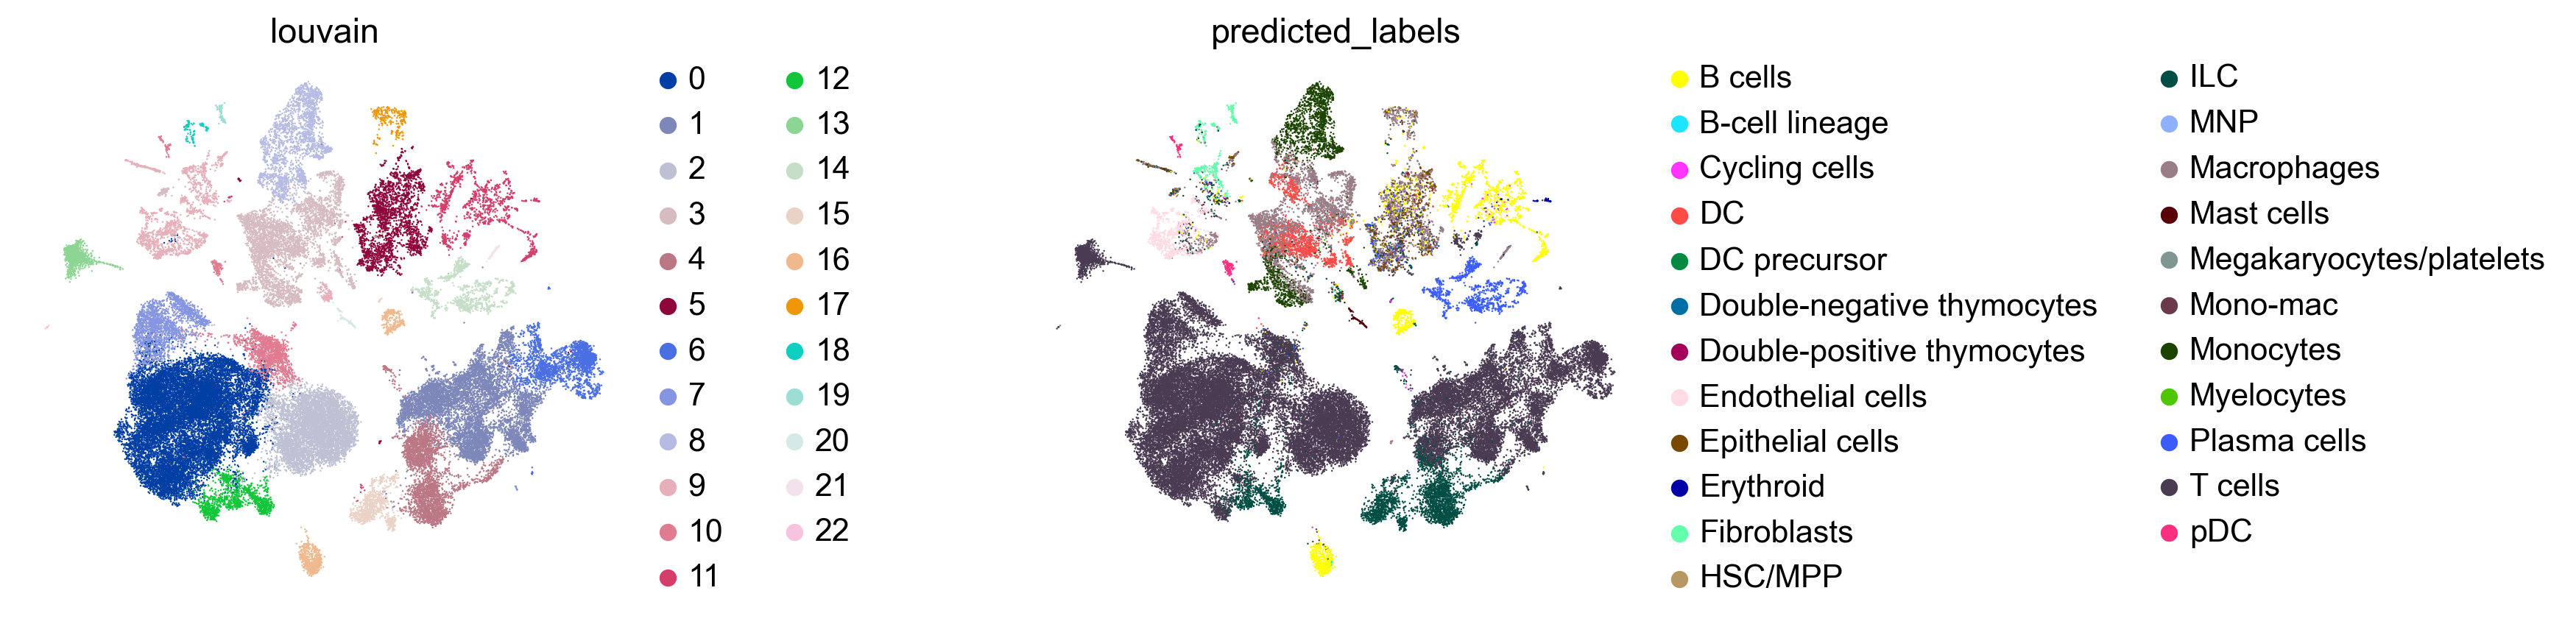

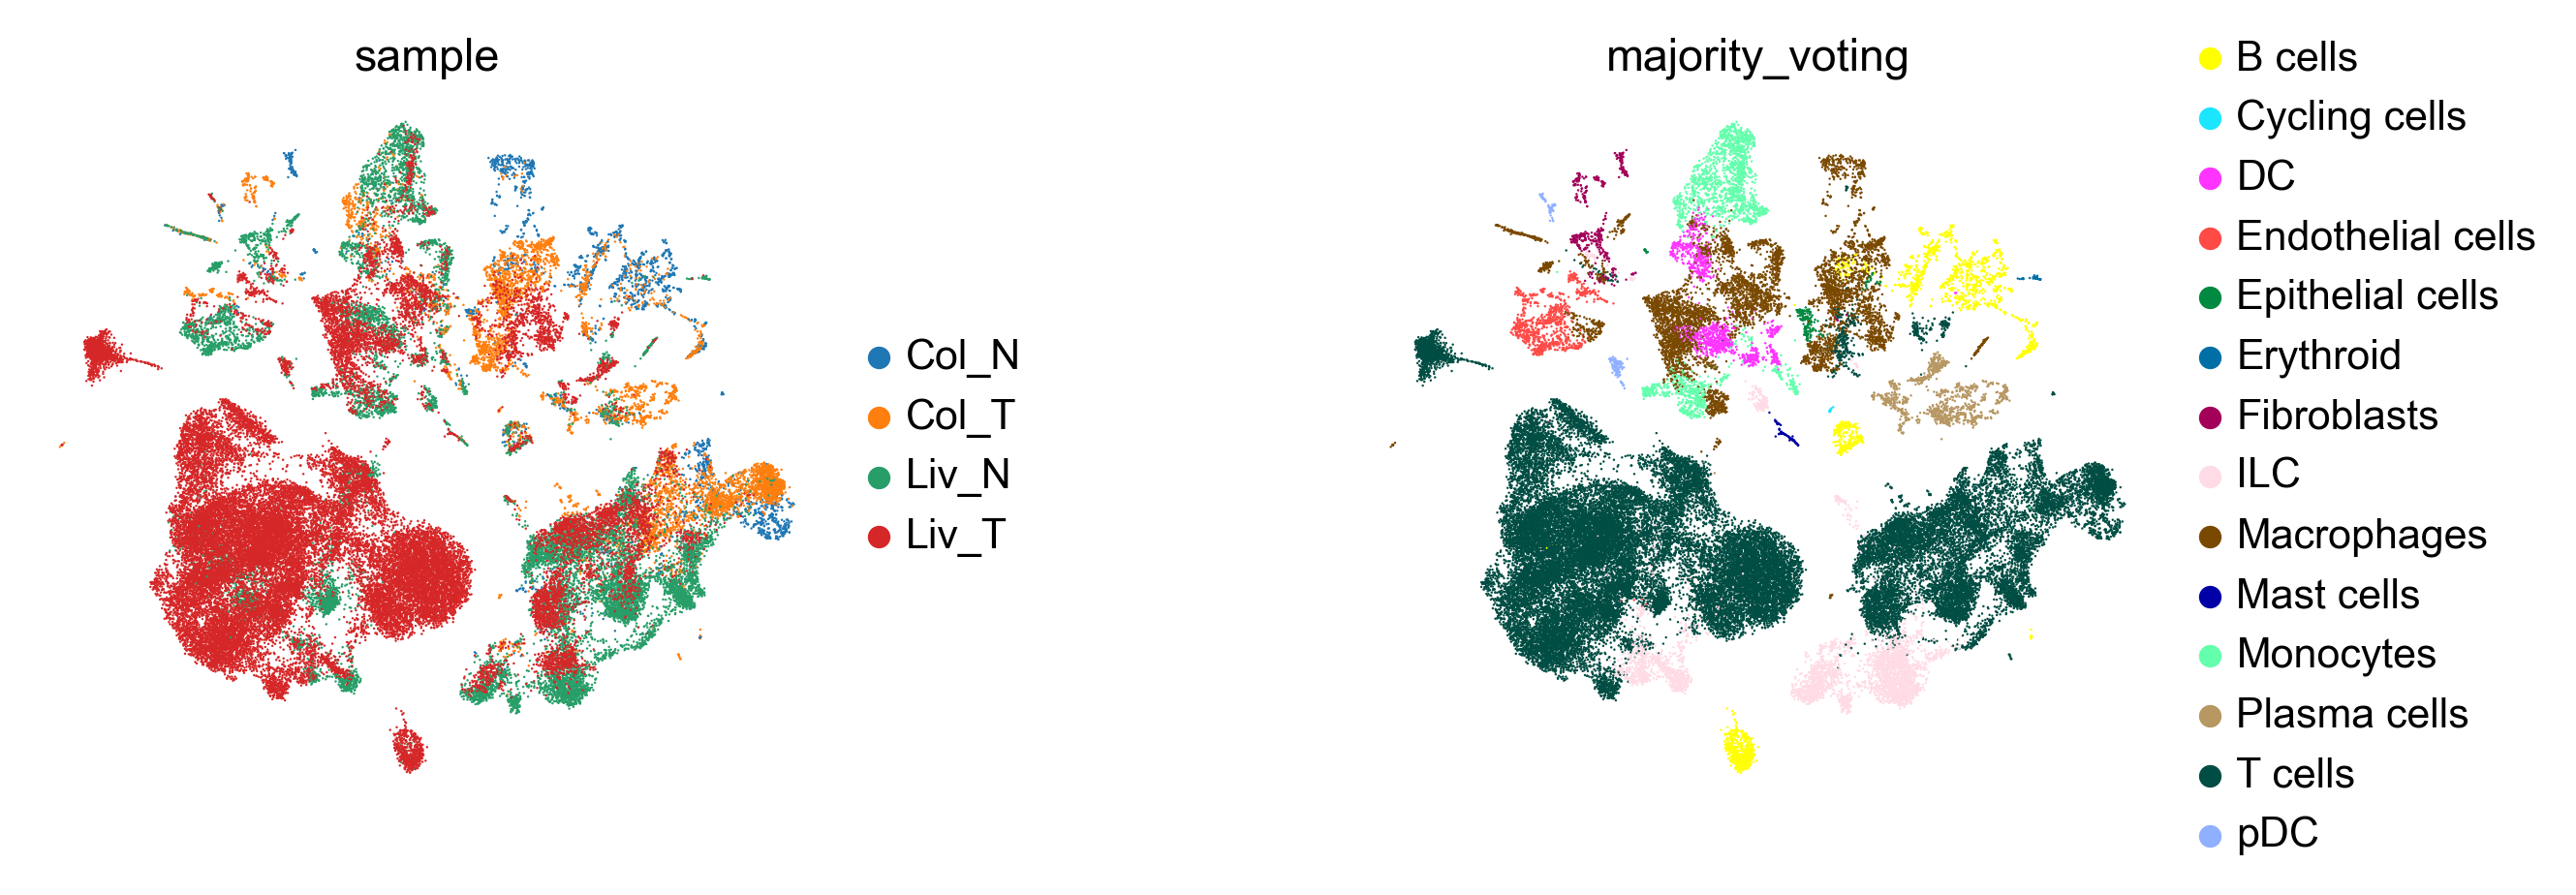

In [38]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata_predic, color = ['louvain', 'predicted_labels'], wspace=0.5, show=True)
    sc.pl.umap(adata_predic, color = ['sample', 'majority_voting'], wspace=0.5, show=True)

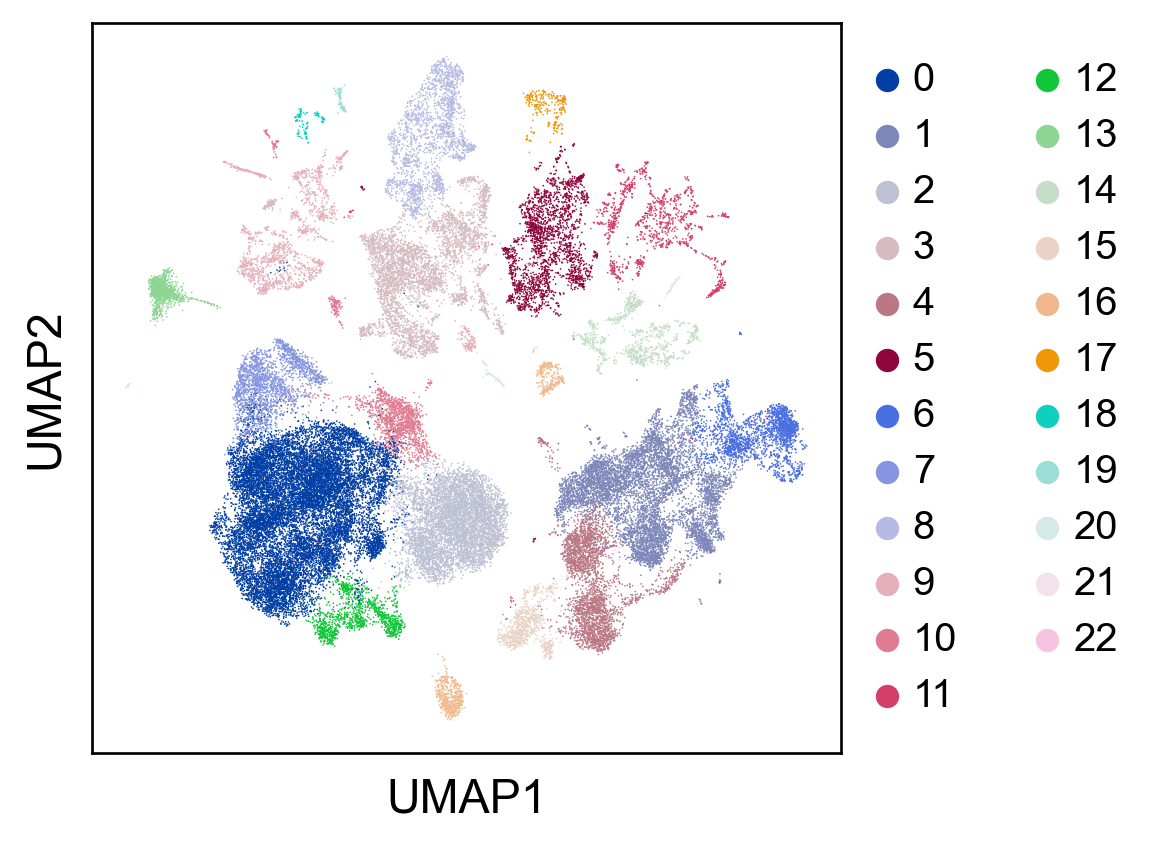

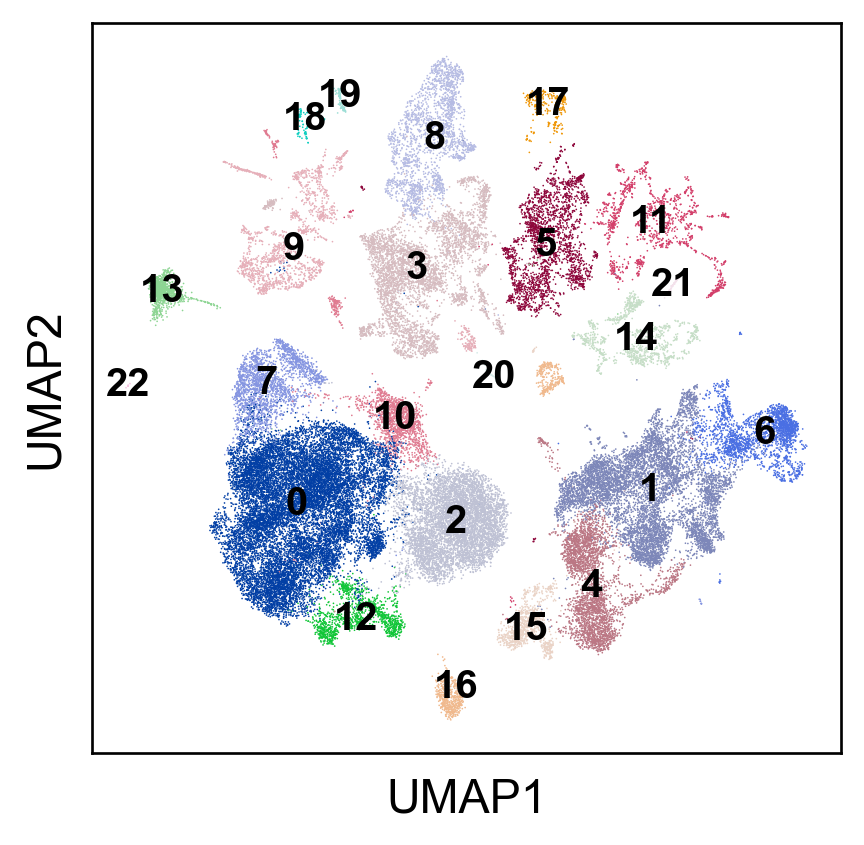

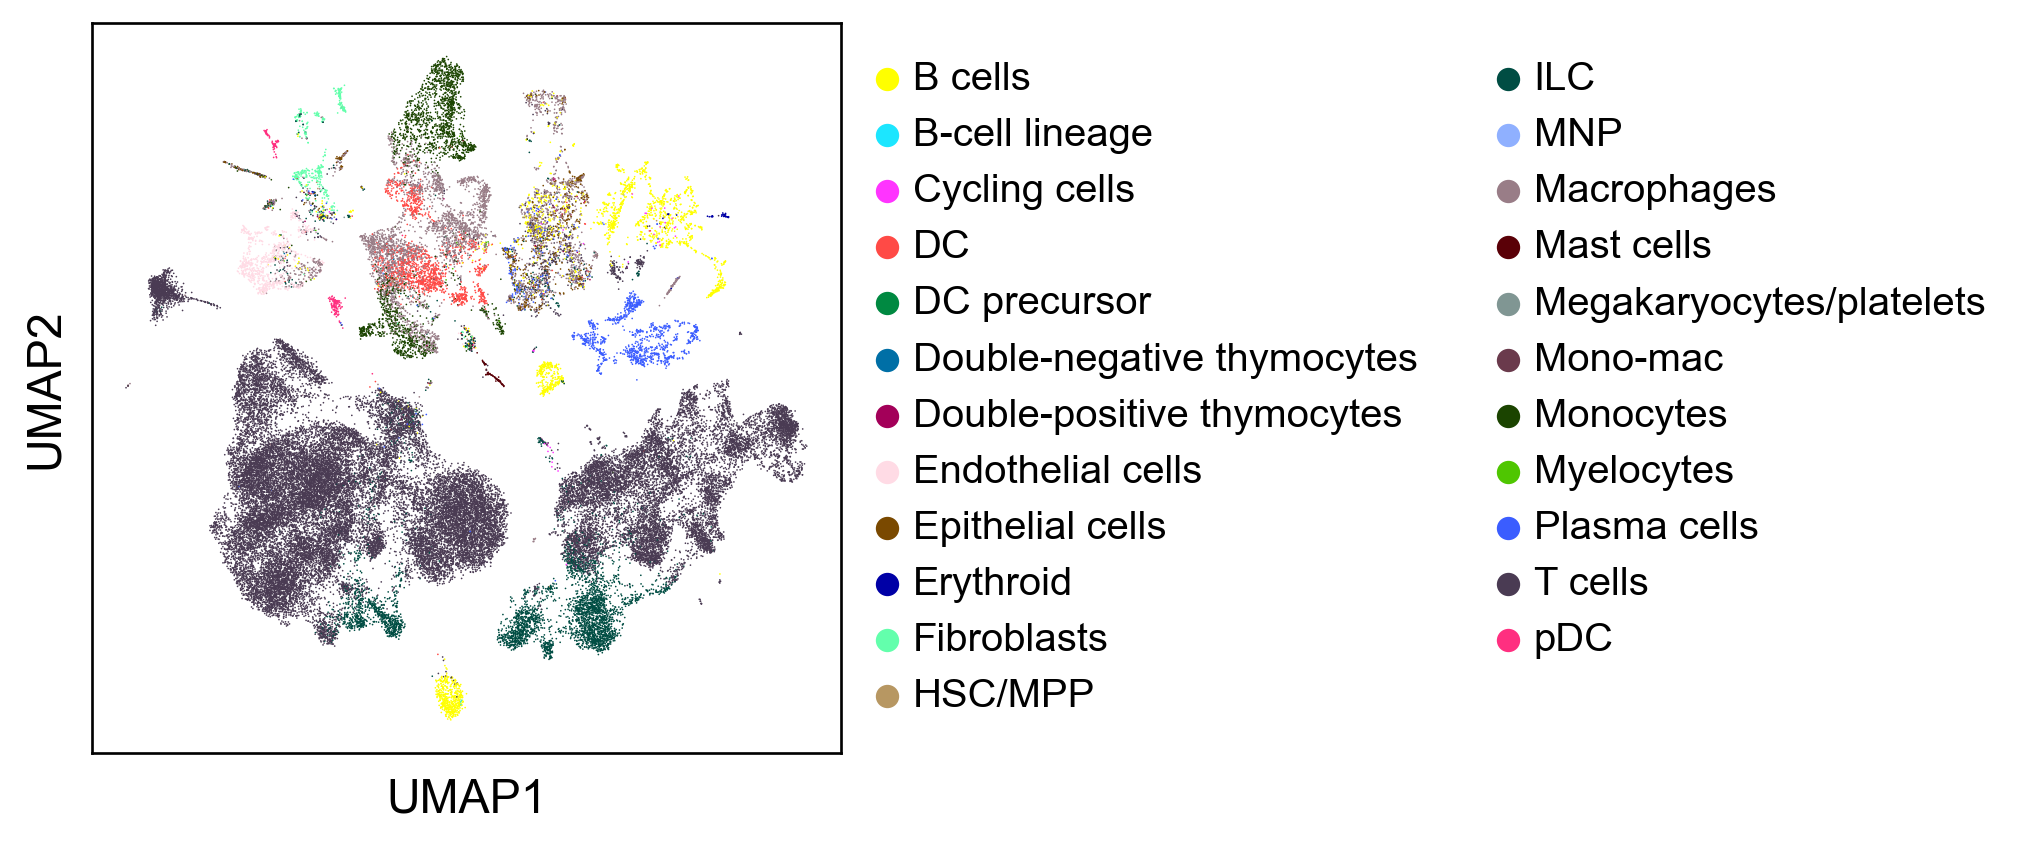

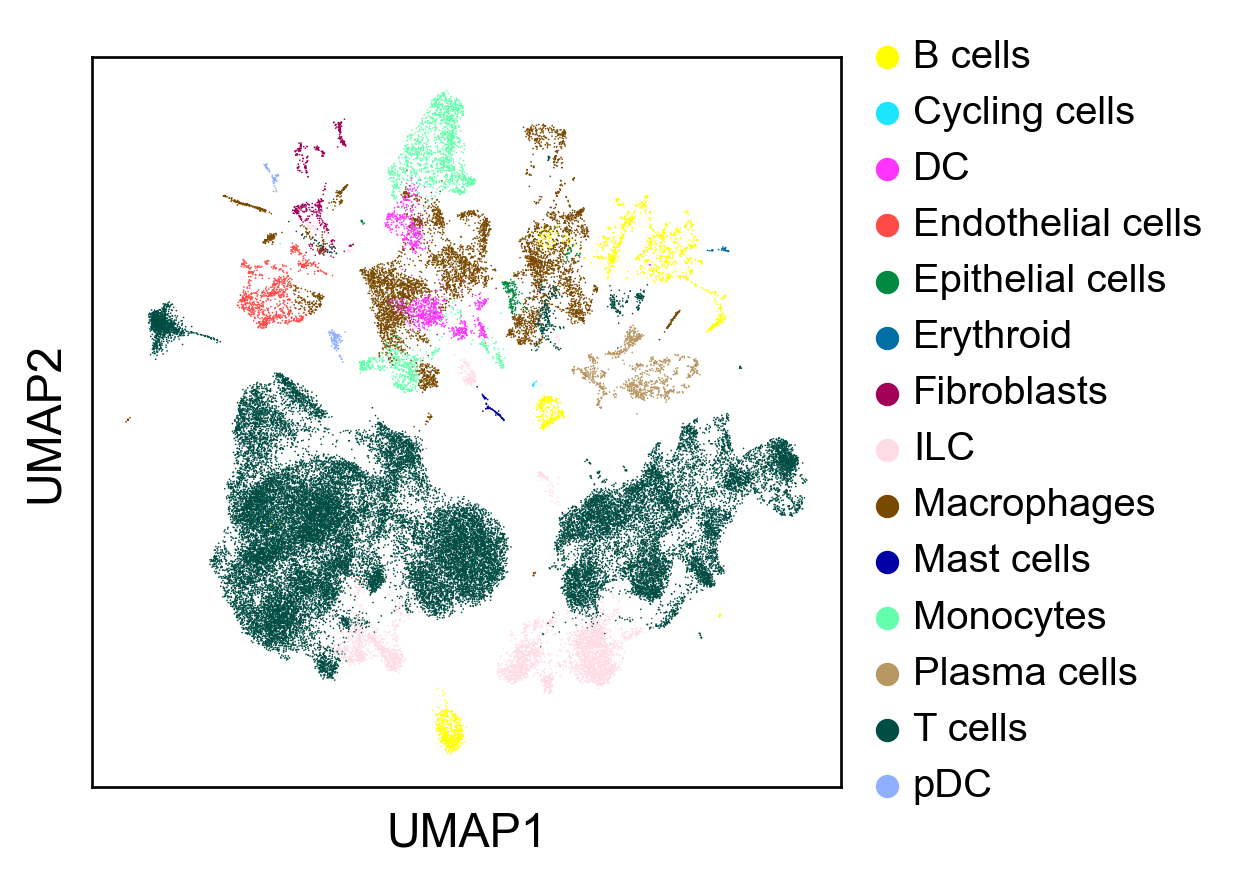

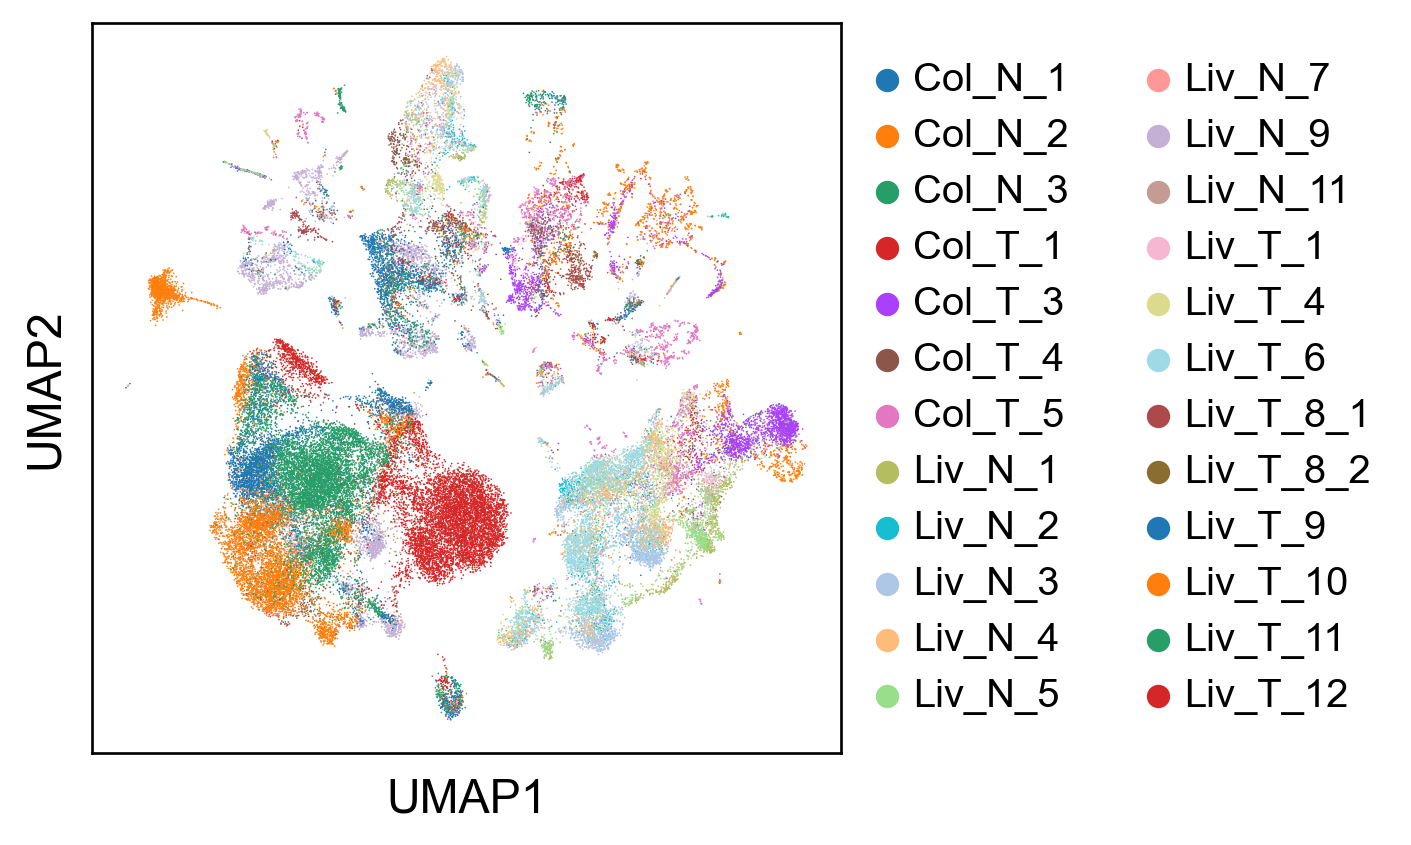

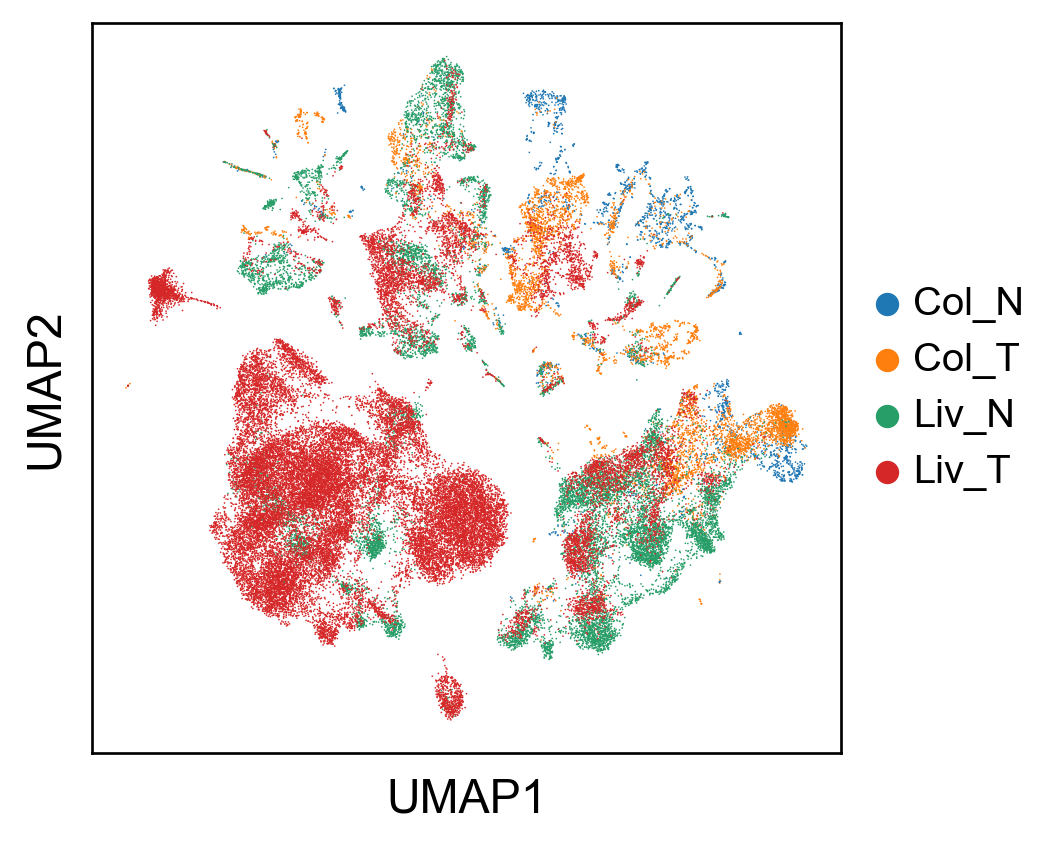

In [39]:
with rc_context({'figure.figsize': (4, 4), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.umap(adata_predic, color = ['louvain'], title='', size=1, legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_01_louvain.pdf")
    sc.pl.umap(adata_predic, color = ['louvain'], title='', size=1, legend_loc='on data', legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_02_louvain_num.pdf")
    sc.pl.umap(adata_predic, color = ['predicted_labels'], title='', size=1, legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_03_annotation_authors.pdf")
    sc.pl.umap(adata_predic, color = ['majority_voting'], title='', size=1, legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_04_majority_voting.pdf")
    sc.pl.umap(adata_predic, color = ['batch'], title='', size=1, legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_05_batch.pdf")
    sc.pl.umap(adata_predic, color = ['sample'], title='', size=1, legend_fontsize=12, frameon=True, wspace=0.5, show=True, save="_06_sample.pdf")

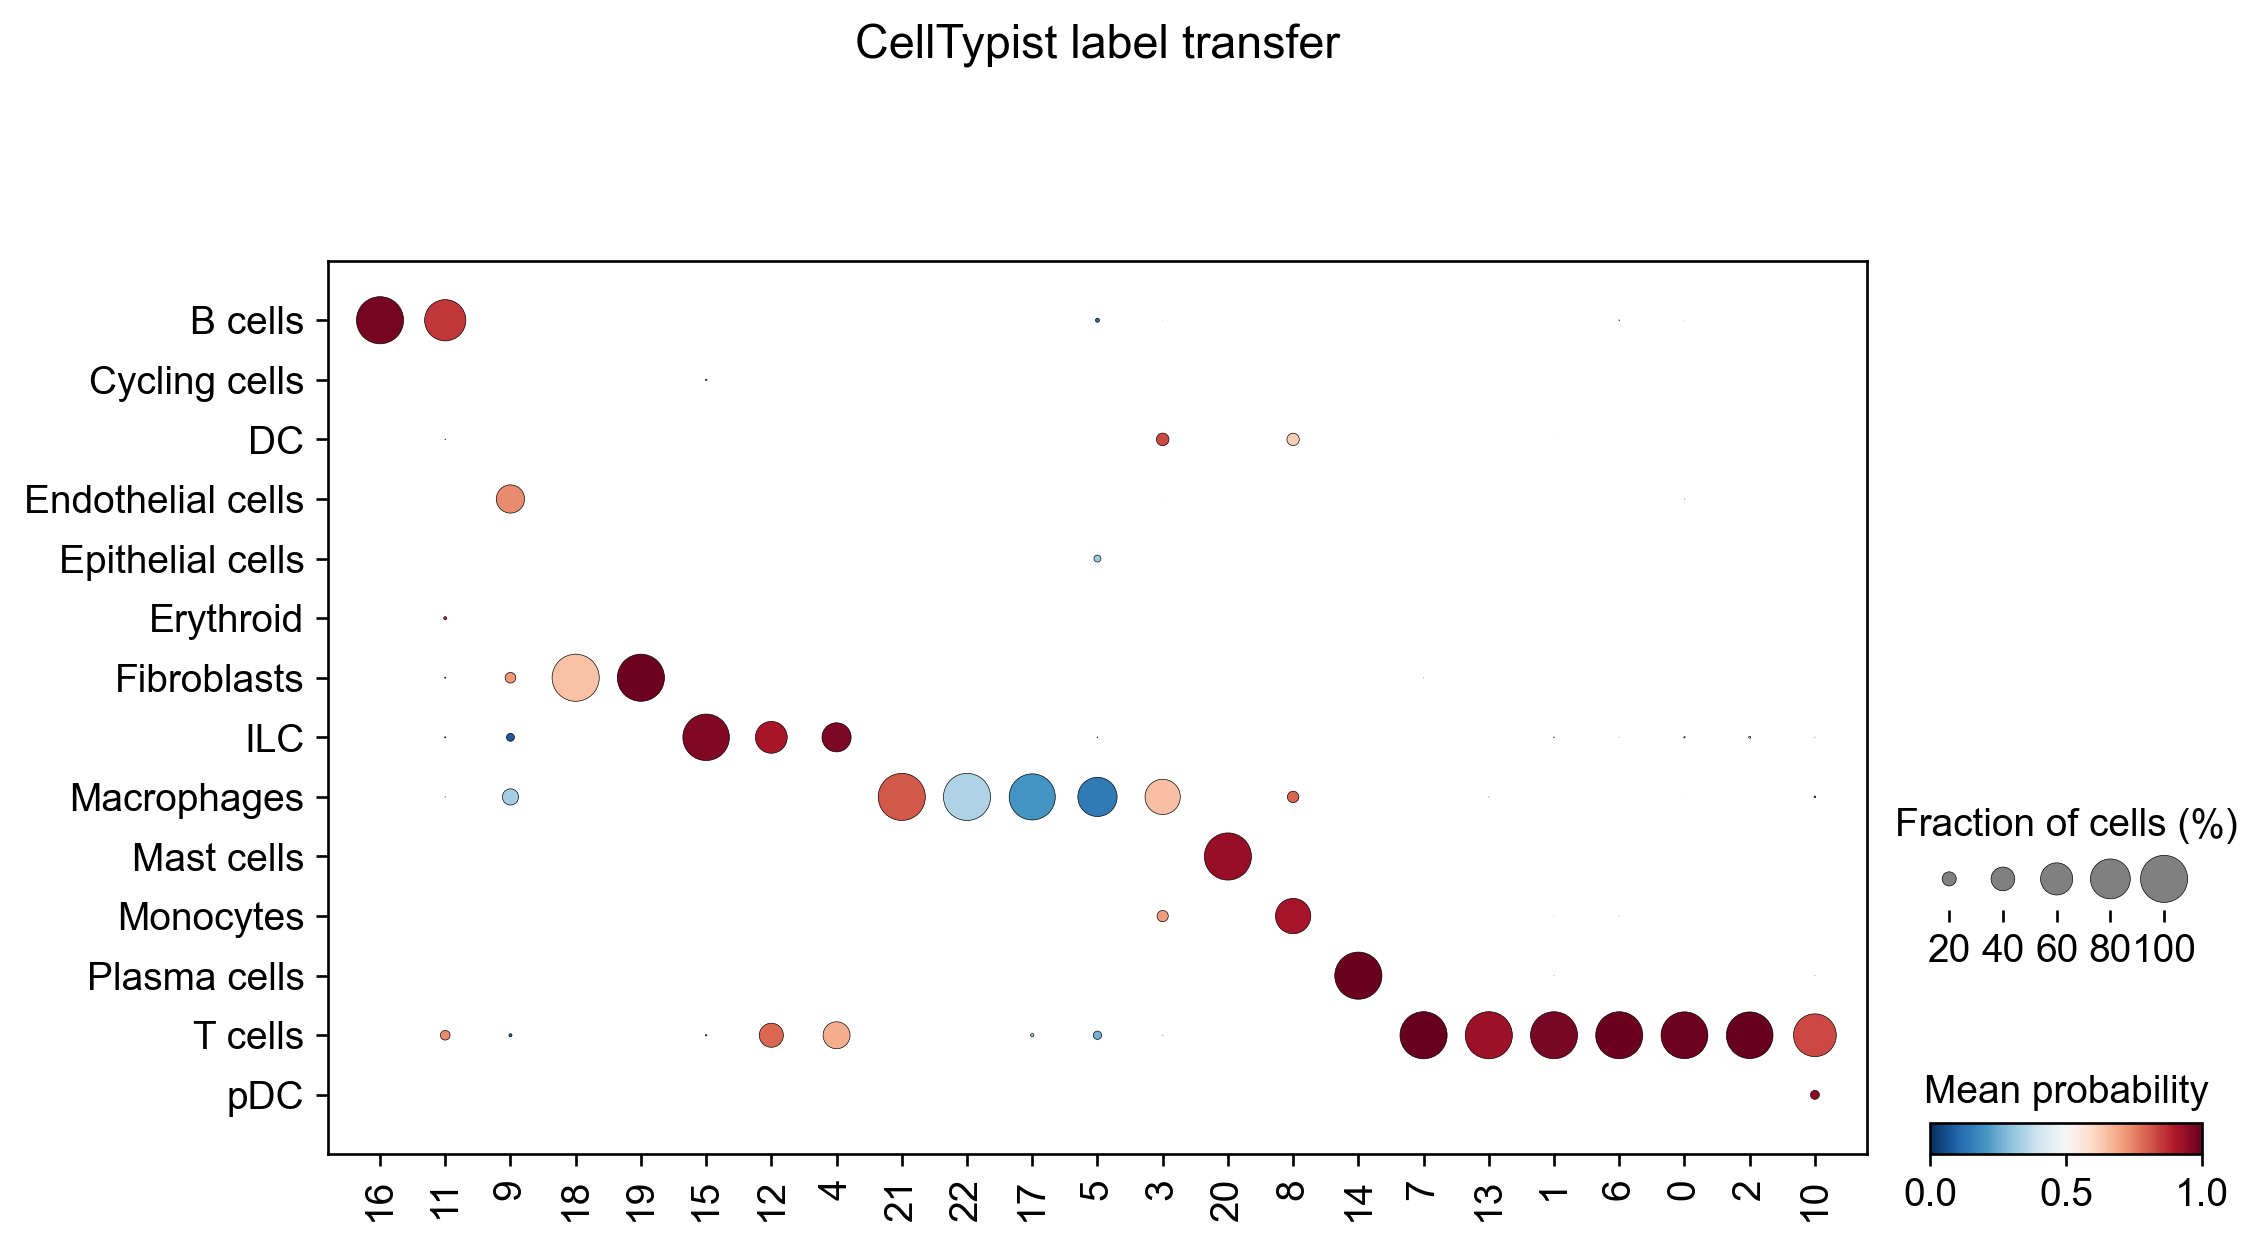

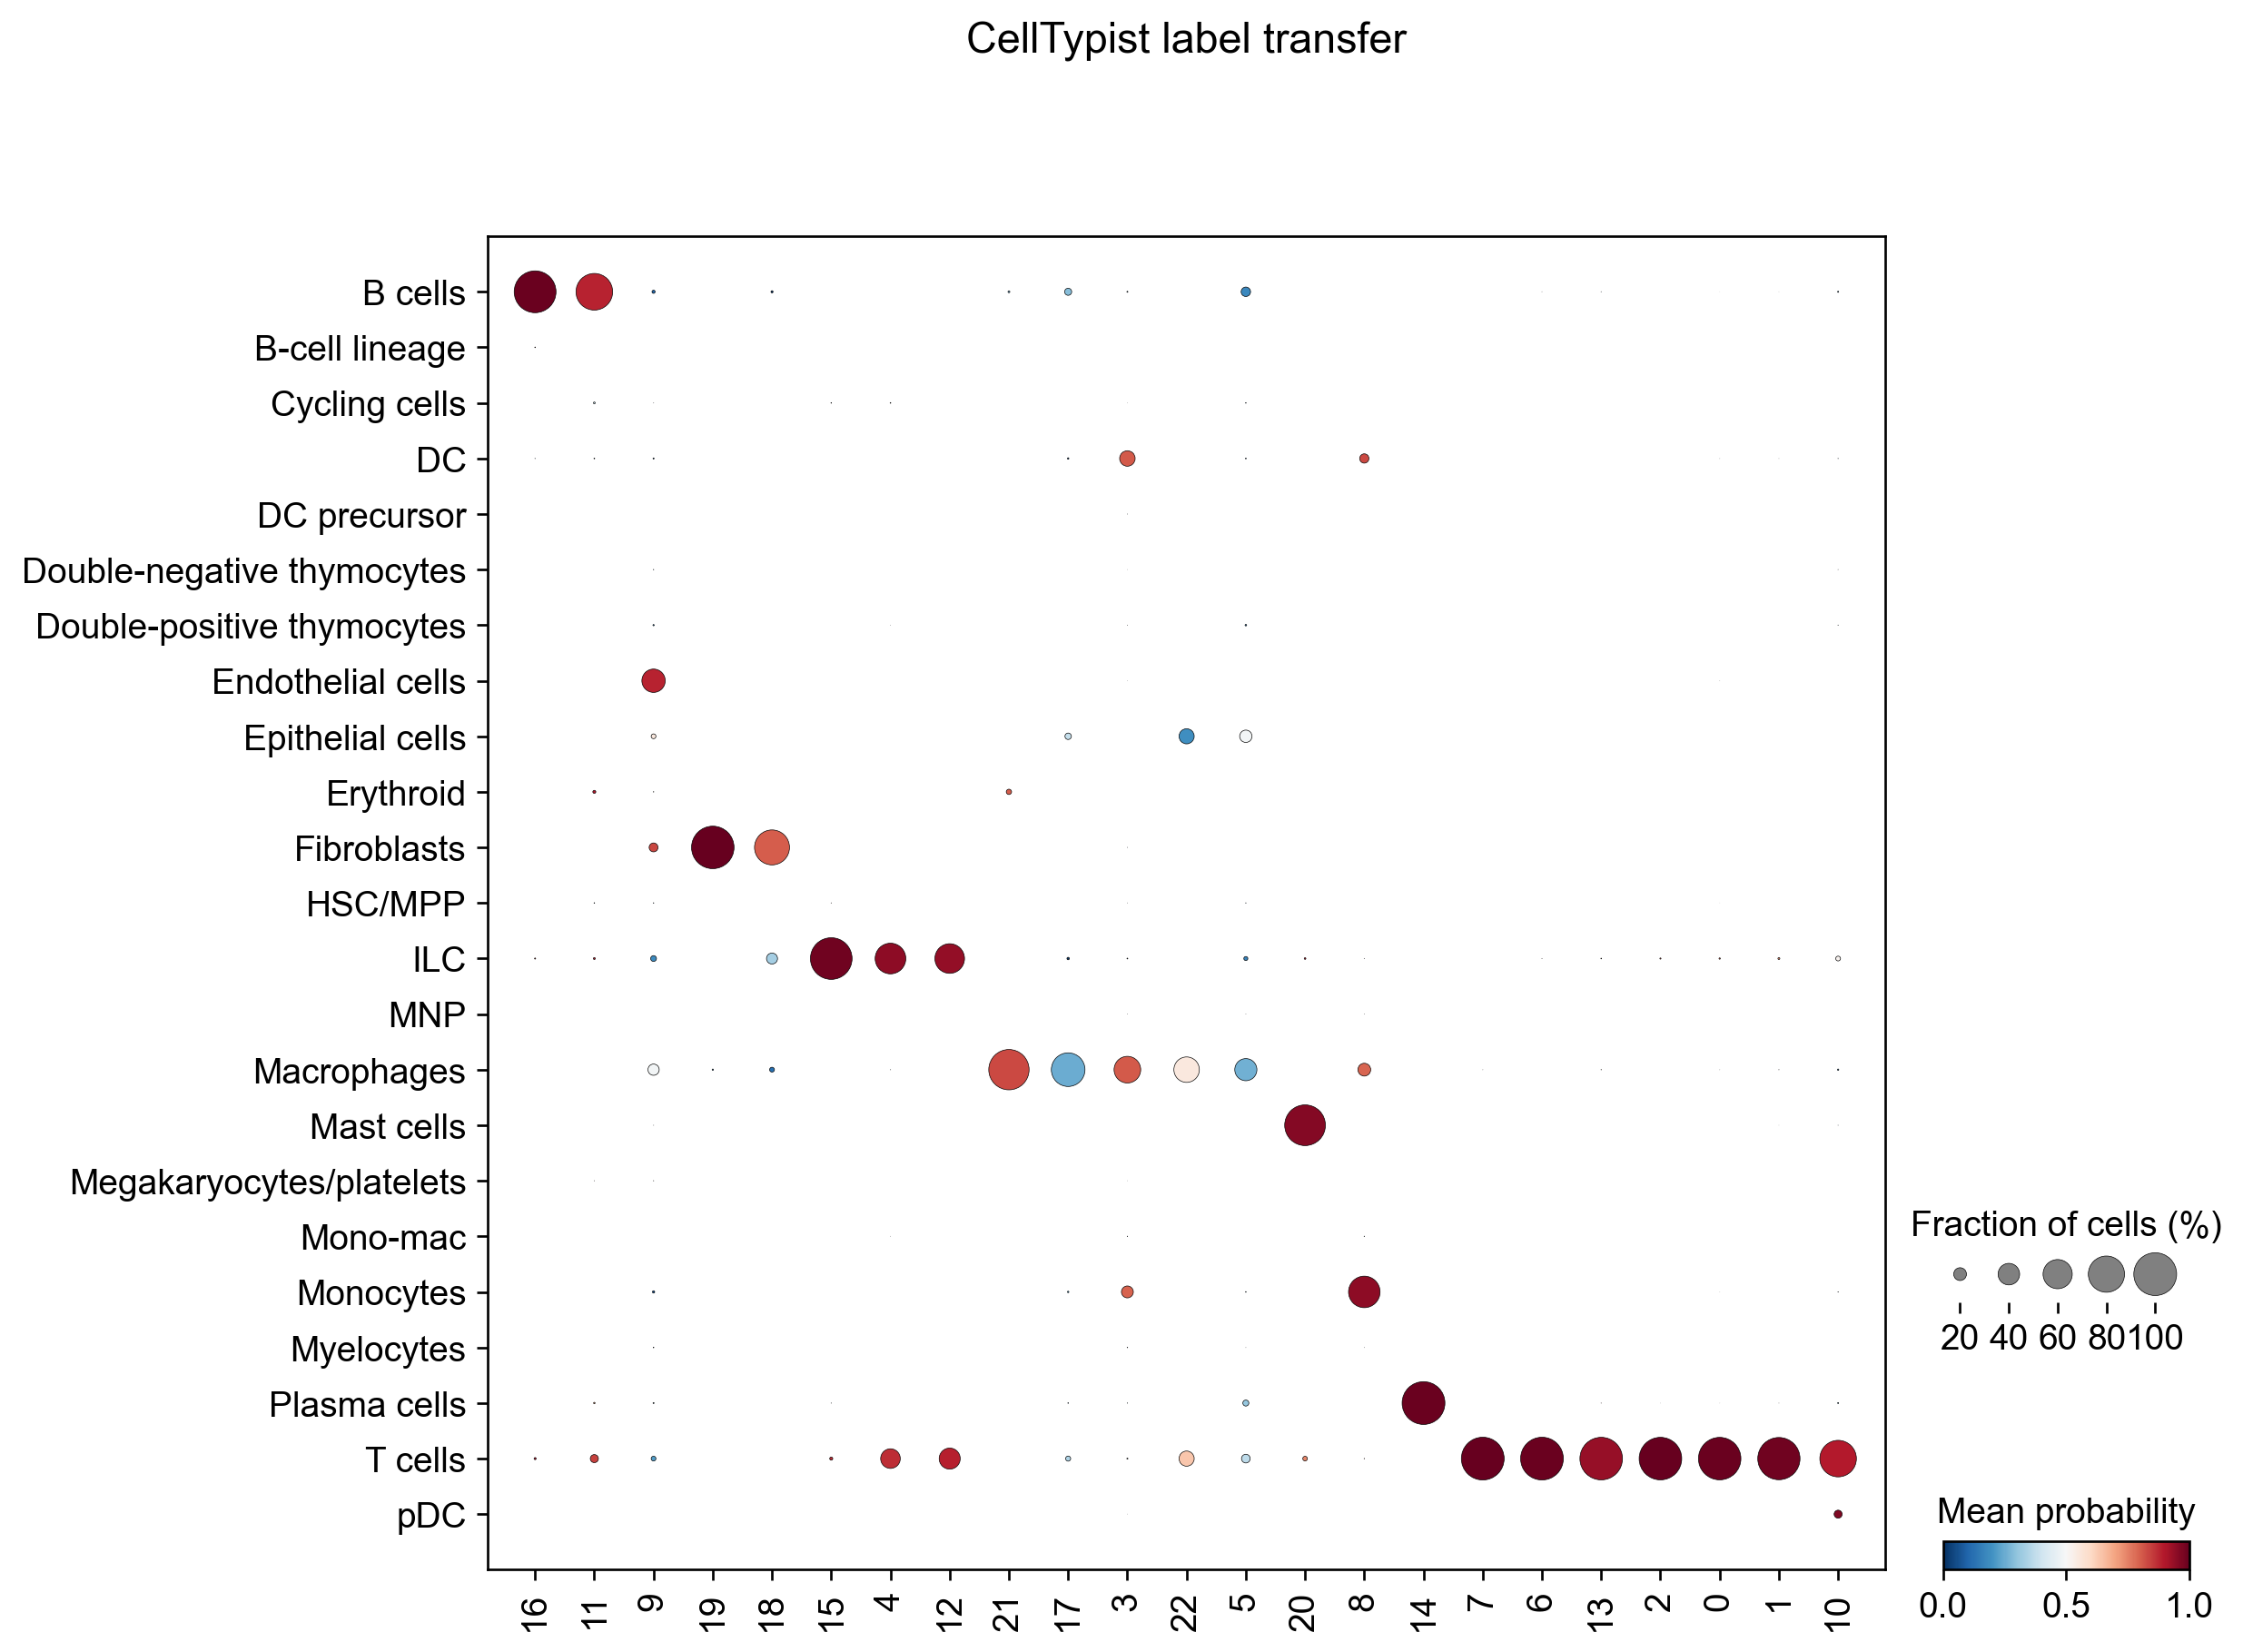

In [40]:
celltypist.dotplot(predictions, use_as_reference = 'louvain', use_as_prediction = 'majority_voting', swap_axes=False, 
    standard_scale='var', mean_only_expressed=True, save="01_louvain_majorVot.pdf")
celltypist.dotplot(predictions, use_as_reference = 'louvain', use_as_prediction = 'predicted_labels', swap_axes=False, 
    standard_scale='var', mean_only_expressed=True, save="02_louvain_predicted_labels.pdf")

## 3. Examine expression of cell type-driving genes

Extract the top three driving genes of Mast cells using the extract_top_markers method.

In [41]:
model.cell_types

array(['B cells', 'B-cell lineage', 'Cycling cells', 'DC', 'DC precursor',
       'Double-negative thymocytes', 'Double-positive thymocytes', 'ETP',
       'Early MK', 'Endothelial cells', 'Epithelial cells',
       'Erythrocytes', 'Erythroid', 'Fibroblasts', 'Granulocytes',
       'HSC/MPP', 'ILC', 'ILC precursor', 'MNP', 'Macrophages',
       'Mast cells', 'Megakaryocyte precursor',
       'Megakaryocytes/platelets', 'Mono-mac', 'Monocyte precursor',
       'Monocytes', 'Myelocytes', 'Plasma cells', 'Promyelocytes',
       'T cells', 'pDC', 'pDC precursor'], dtype=object)

In [24]:
# # top_3_genes of CD16+ NK cells
# top_3_genes = model.extract_top_markers("CD16+ NK cells", 3)
# top_3_genes

# # Check expression of the three genes in the training set.
# sc.pl.violin(adata_predic, top_3_genes, groupby = 'batch', wspace=0.5, rotation = 90)

# # Check expression of the three genes in the query set.
# # Here we use `majority_voting` from CellTypist as the cell type labels for this dataset.
# sc.pl.violin(adata_predic, top_3_genes, groupby = 'majority_voting', wspace=0.5, rotation = 90)

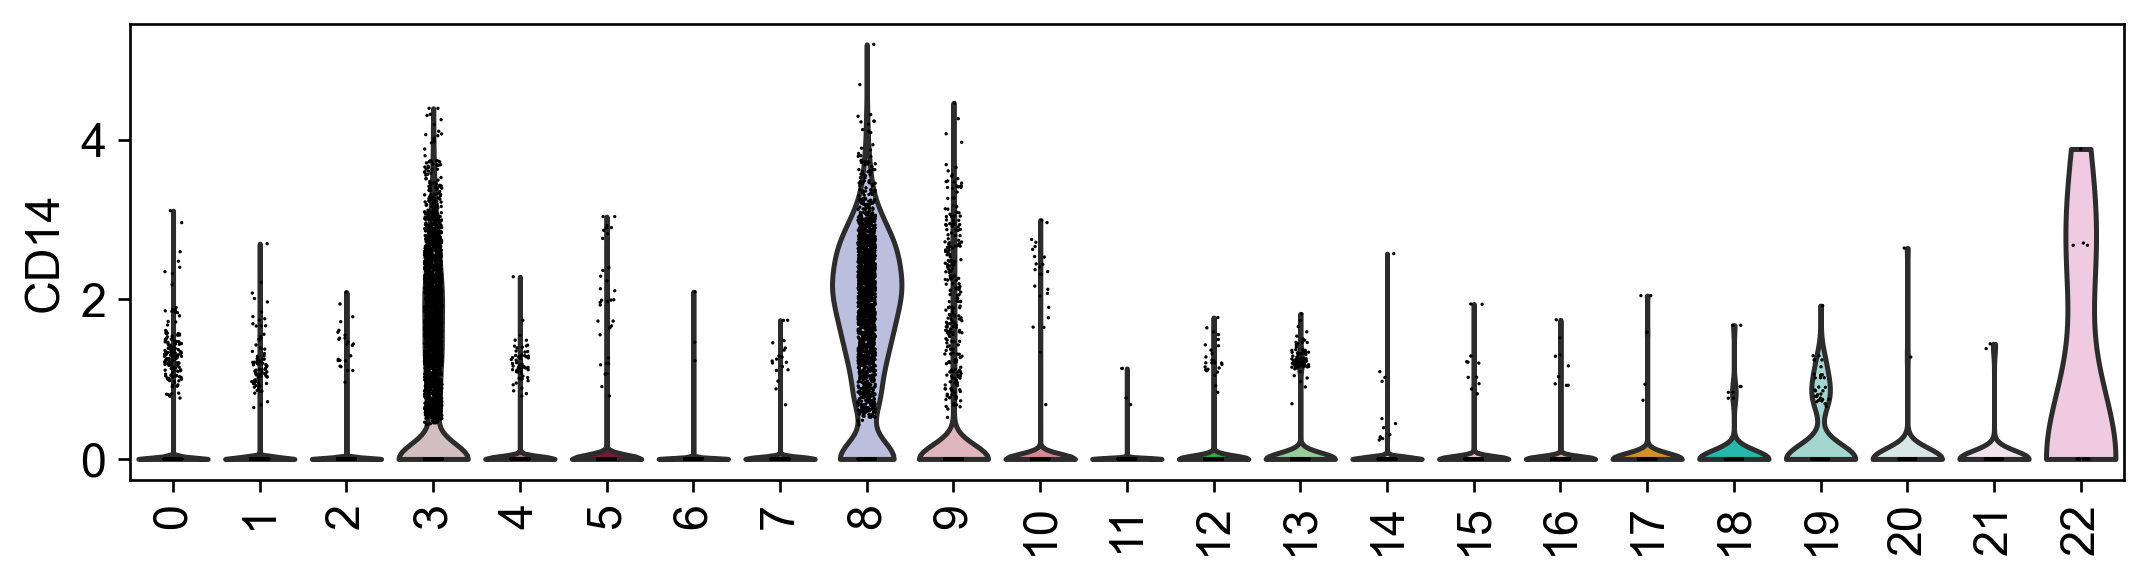

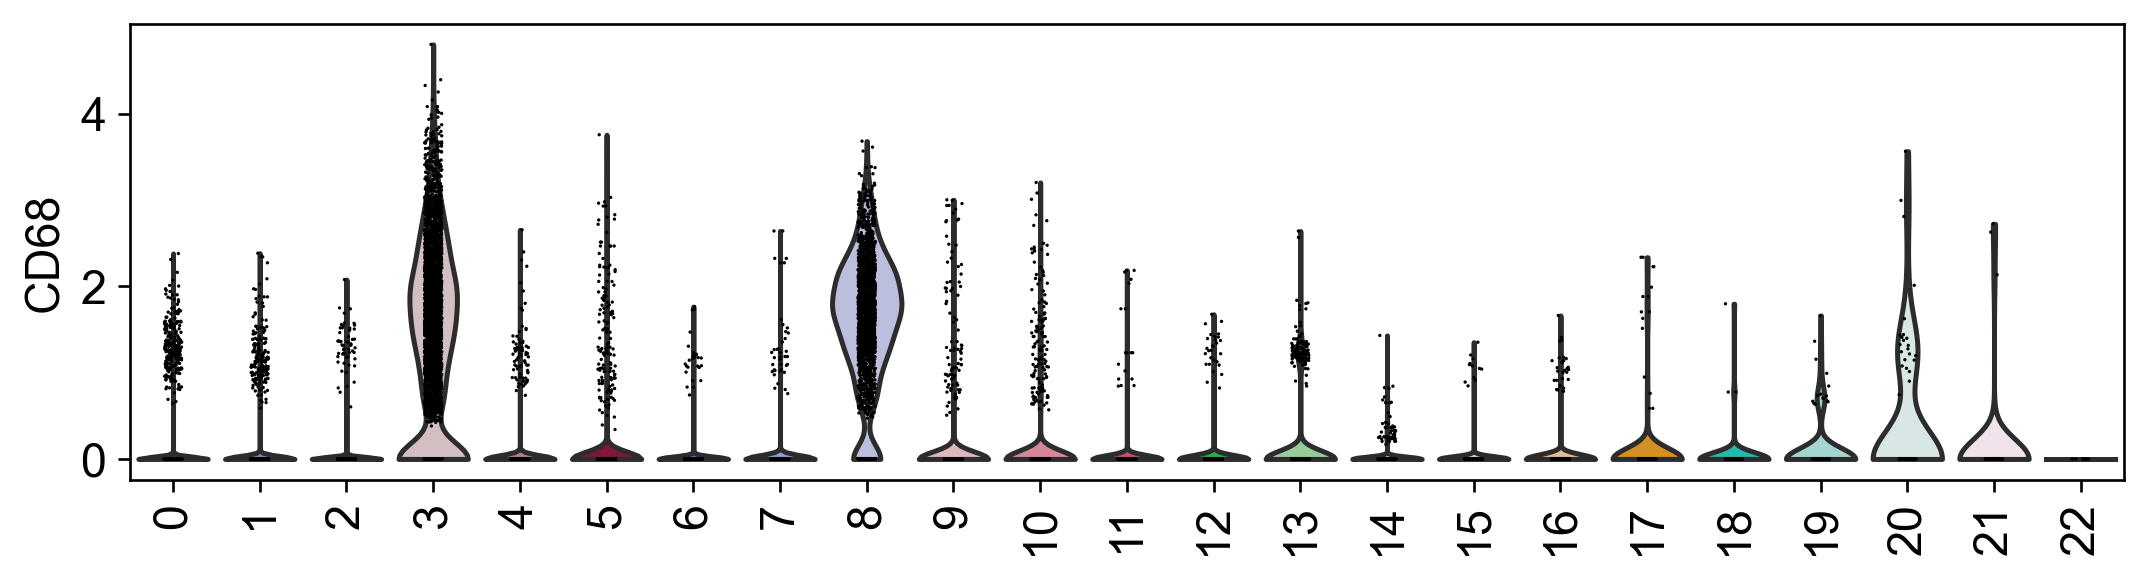

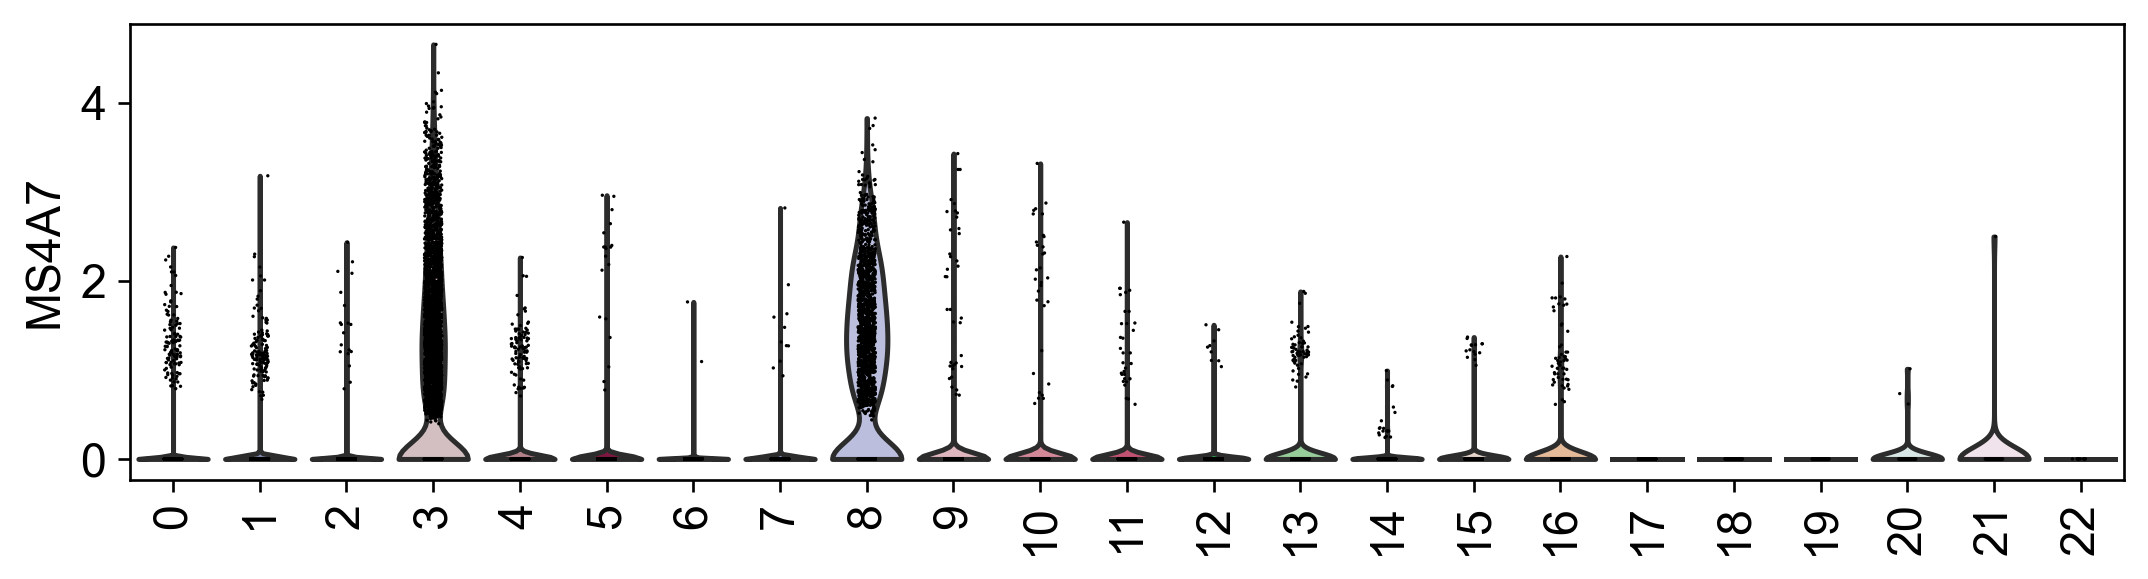

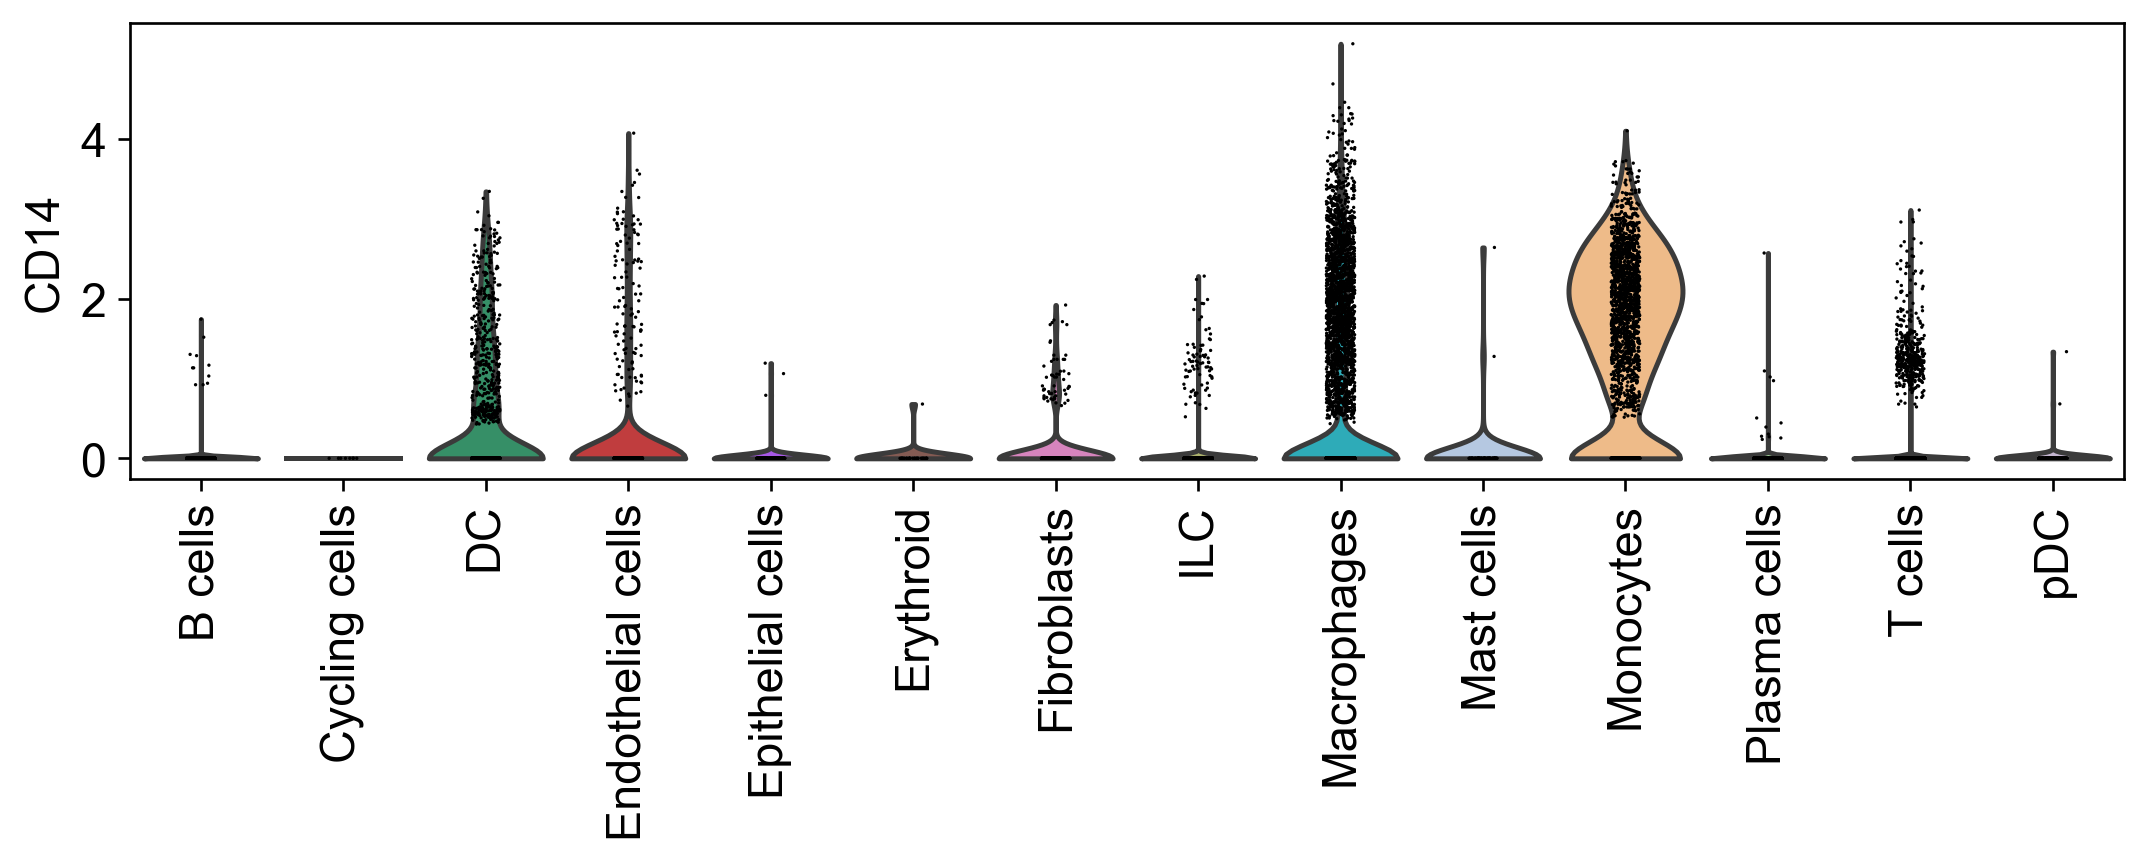

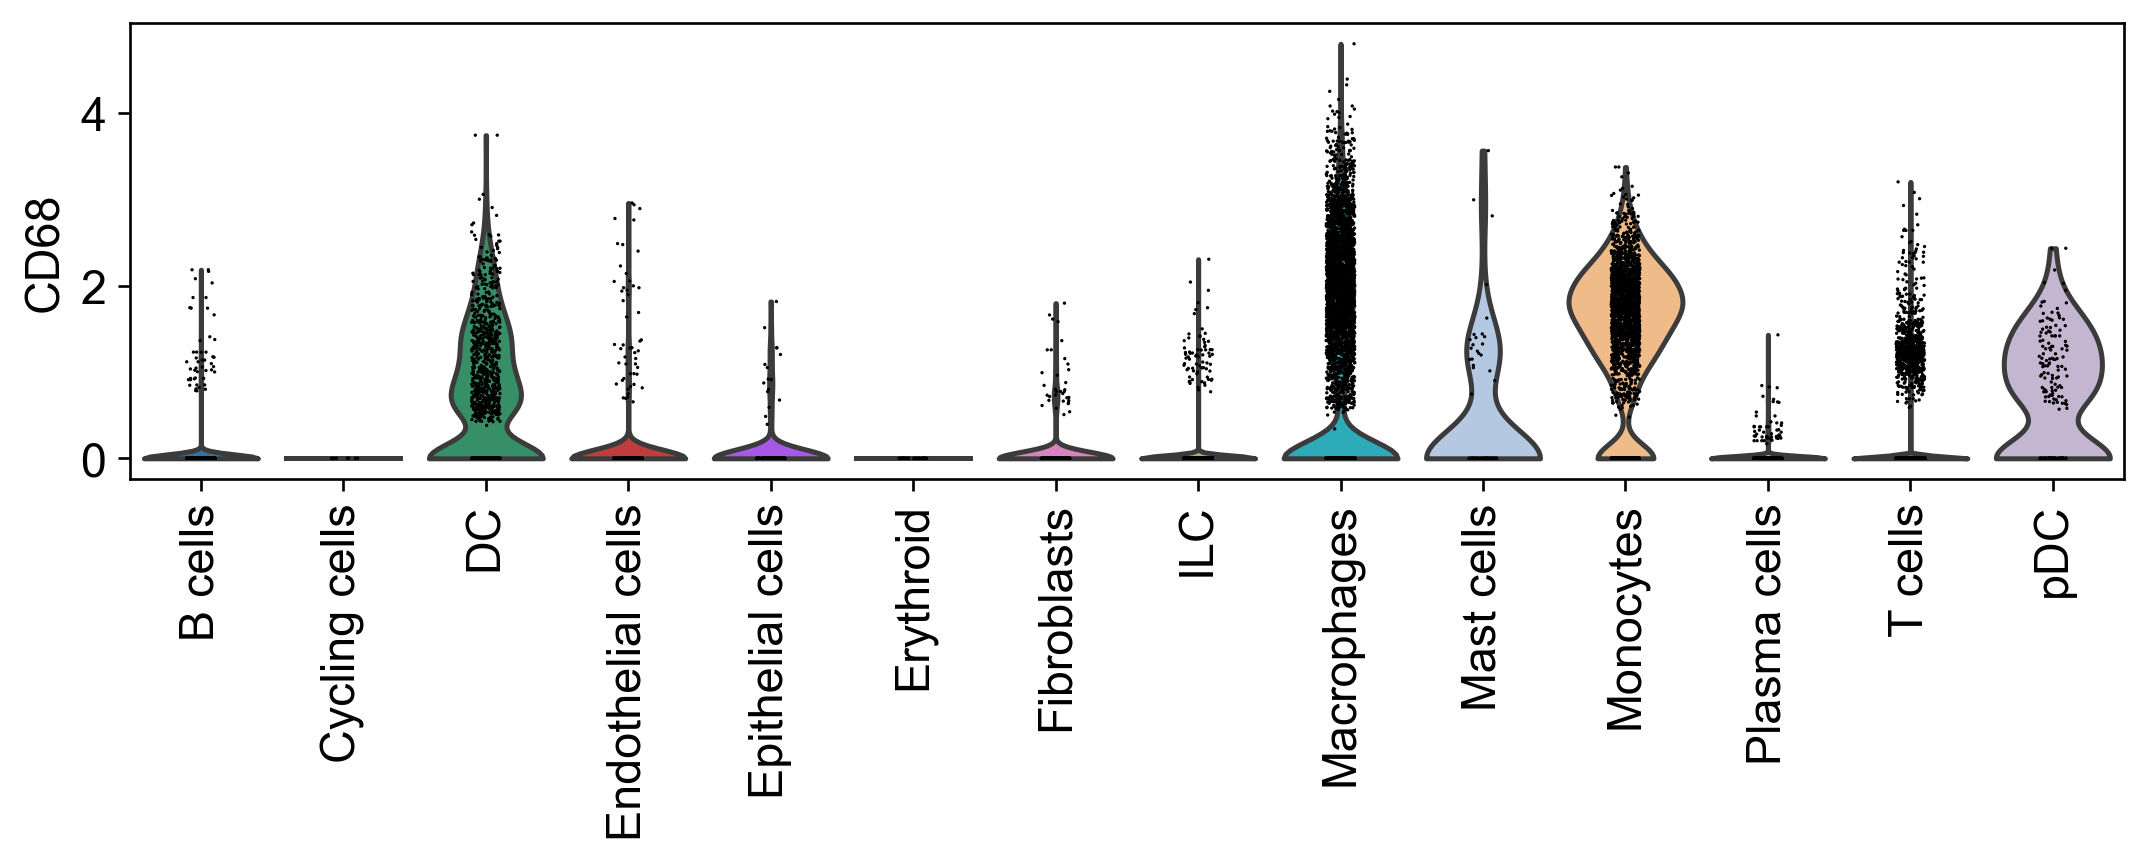

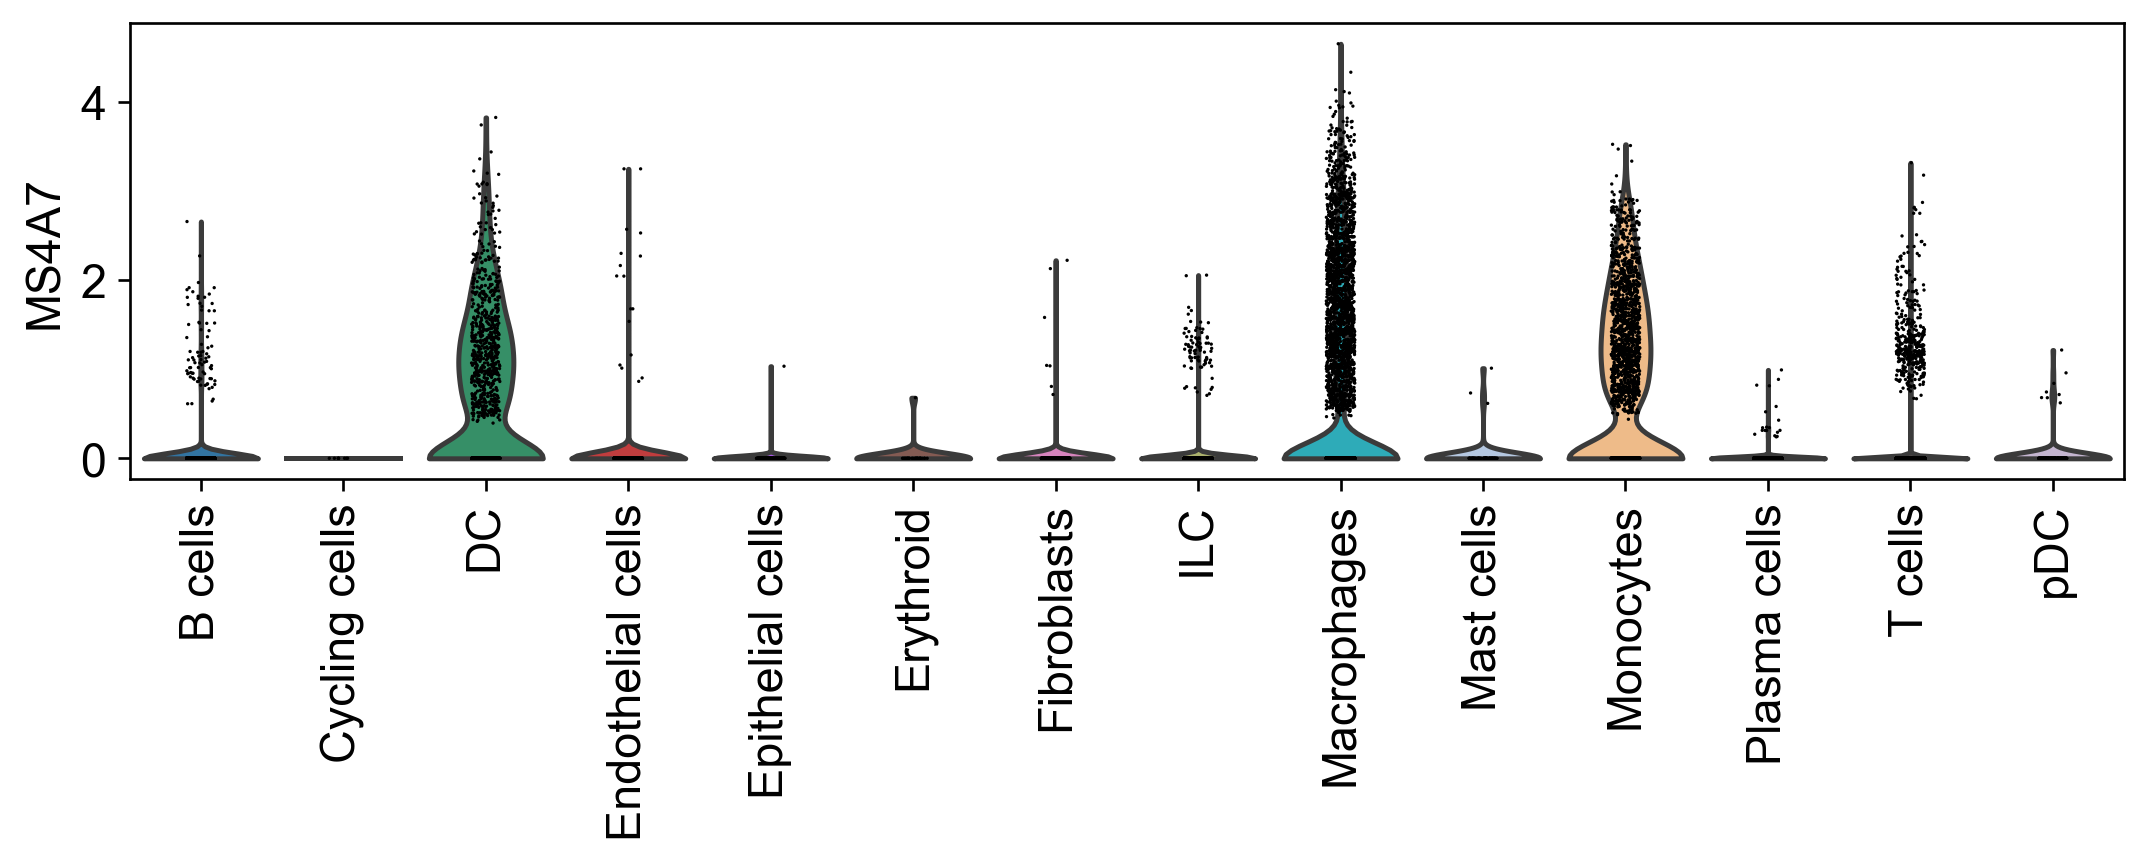

In [42]:
with rc_context({'figure.figsize': (9, 2.5), 'figure.facecolor':'#FFFFFF', 'savefig.dpi': '300', 'axes.grid':'False', 'legend.loc':'best'}):
    sc.pl.violin(adata_predic, ['CD14'], groupby = 'louvain', wspace=0.5, rotation = 90)
    sc.pl.violin(adata_predic, ['CD68'], groupby = 'louvain', wspace=0.5, rotation = 90)
    sc.pl.violin(adata_predic, ['MS4A7'], groupby = 'louvain', wspace=0.5, rotation = 90)
    sc.pl.violin(adata_predic, ['CD14'], groupby = 'majority_voting', wspace=0.5, rotation = 90)
    sc.pl.violin(adata_predic, ['CD68'], groupby = 'majority_voting', wspace=0.5, rotation = 90)
    sc.pl.violin(adata_predic, ['MS4A7'], groupby = 'majority_voting', wspace=0.5, rotation = 90)